In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv("D:\Ashvini\Data Science\Data for practise\mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.shape

(8124, 23)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
#df.drop(['veil-type','veil-color'],axis=1,inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder=LabelEncoder()

In [11]:
cat_vars = df.select_dtypes(include=['object']).columns

In [12]:
for i in cat_vars:
    print(f'{i}:  {df[i].unique()}')

class:  ['p' 'e']
cap-shape:  ['x' 'b' 's' 'f' 'k' 'c']
cap-surface:  ['s' 'y' 'f' 'g']
cap-color:  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises:  ['t' 'f']
odor:  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment:  ['f' 'a']
gill-spacing:  ['c' 'w']
gill-size:  ['n' 'b']
gill-color:  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape:  ['e' 't']
stalk-root:  ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring:  ['s' 'f' 'k' 'y']
stalk-surface-below-ring:  ['s' 'f' 'y' 'k']
stalk-color-above-ring:  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring:  ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type:  ['p']
veil-color:  ['w' 'n' 'o' 'y']
ring-number:  ['o' 't' 'n']
ring-type:  ['p' 'e' 'l' 'f' 'n']
spore-print-color:  ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population:  ['s' 'n' 'a' 'v' 'y' 'c']
habitat:  ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [13]:
for i in cat_vars:
    df[i]=encoder.fit_transform(df[i])

In [14]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [15]:
for i in cat_vars:
    print(f'{i}:  {df[i].unique()}')

class:  [1 0]
cap-shape:  [5 0 4 2 3 1]
cap-surface:  [2 3 0 1]
cap-color:  [4 9 8 3 2 5 0 7 1 6]
bruises:  [1 0]
odor:  [6 0 3 5 2 1 8 7 4]
gill-attachment:  [1 0]
gill-spacing:  [0 1]
gill-size:  [1 0]
gill-color:  [ 4  5  2  7 10  3  9  1  0  8 11  6]
stalk-shape:  [0 1]
stalk-root:  [3 2 1 4 0]
stalk-surface-above-ring:  [2 0 1 3]
stalk-surface-below-ring:  [2 0 3 1]
stalk-color-above-ring:  [7 3 6 4 0 2 5 1 8]
stalk-color-below-ring:  [7 6 3 0 4 2 8 5 1]
veil-type:  [0]
veil-color:  [2 0 1 3]
ring-number:  [1 2 0]
ring-type:  [4 0 2 1 3]
spore-print-color:  [2 3 6 1 7 5 4 8 0]
population:  [3 2 0 4 5 1]
habitat:  [5 1 3 0 4 6 2]


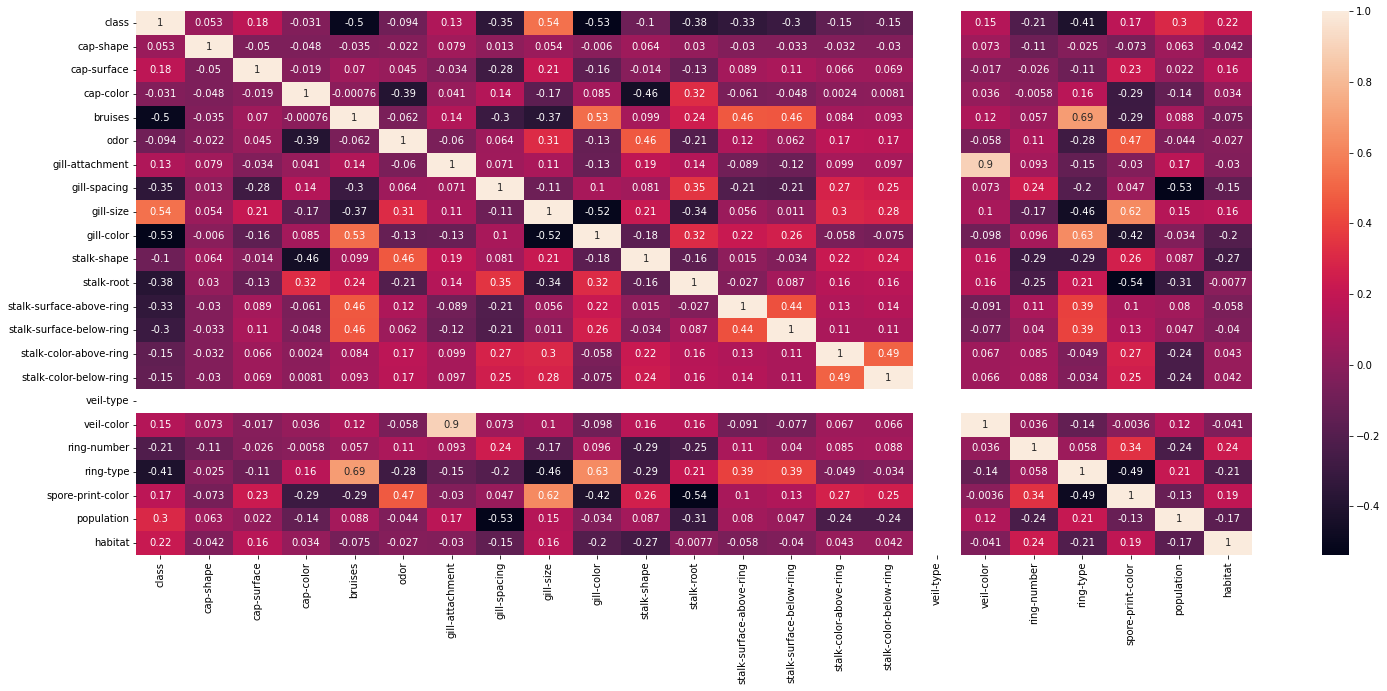

In [16]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [17]:
X=df.drop('class',axis=1)

In [18]:
y=df['class']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
X_train.shape

(6499, 22)

In [22]:
X_test.shape

(1625, 22)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
lg=LogisticRegression()

In [26]:
param_grid={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
          'C':[1.0,2.5,1.5,0.5],
           'max_iter' : [100,150,200],
           'random_state':[0,42]}

In [27]:
grid_search=GridSearchCV(lg,param_grid,cv=5)
import warnings
warnings.filterwarnings("ignore")

In [28]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.5, 1.5, 0.5], 'max_iter': [100, 150, 200],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [0, 42]})

In [29]:
grid_search.best_params_

{'C': 1.0, 'max_iter': 200, 'penalty': 'none', 'random_state': 0}

In [30]:
lg=LogisticRegression(C=0.5,max_iter=200,penalty='l2',random_state=0)

In [31]:
lg.fit(X_train,y_train)

LogisticRegression(C=0.5, max_iter=200, random_state=0)

In [44]:
lg.score(X_train,y_train)

0.9518387444222188

In [32]:
lg.score(X_test,y_test)

0.947076923076923

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix

In [34]:
y_pred=lg.predict(X_test)

In [35]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("precision_score: ",precision_score(y_test,y_pred,average='micro'))
print("recall_score: ",recall_score(y_test,y_pred,average='micro'))
print("f1_score:",f1_score(y_test,y_pred,average='micro'))

Accuracy Score:  0.947076923076923
precision_score:  0.947076923076923
recall_score:  0.947076923076923
f1_score: 0.947076923076923


<AxesSubplot:>

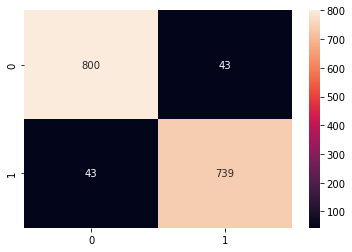

In [36]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

In [37]:
knn=KNeighborsClassifier()

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
knn.score(X_train,y_train)

0.9998461301738729

In [39]:
knn.score(X_test,y_test)

0.9963076923076923

In [40]:
y_pred=knn.predict(X_test)

In [41]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("precision_score: ",precision_score(y_test,y_pred,average='micro'))
print("recall_score: ",recall_score(y_test,y_pred,average='micro'))
print("f1_score:",f1_score(y_test,y_pred,average='micro'))

Accuracy Score:  0.9963076923076923
precision_score:  0.9963076923076923
recall_score:  0.9963076923076923
f1_score: 0.9963076923076923


In [42]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

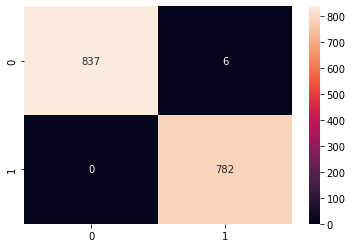

In [43]:
sns.heatmap(cm,annot=True,fmt='d')